In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

We choose the stock AAPL as an example.

In [157]:
ticker = 'AAPL'
AAPL = pd.read_csv(f'/Users/liubohan/Downloads/Stock-Market-Prediction-main/arima/{ticker}_arima.csv')

In [158]:
AAPL.drop(columns=AAPL.columns[0],axis=1,inplace=True)
AAPL.head()

date       open       high        low  adj.close     volume  \
0  2014-01-02  19.845715  19.893929  19.715000  17.388983  234684800   
1  2014-01-03  19.745001  19.775000  19.301071  17.007023  392467600   
2  2014-01-06  19.194643  19.528570  19.057142  17.099764  412610800   
3  2014-01-07  19.440001  19.498571  19.211430  16.977468  317209200   
4  2014-01-08  19.243214  19.484285  19.238930  17.084984  258529600   

       macd    boll_ub    boll_lb     rsi_30     cci_30      dx_30  \
0  0.175853  18.023917  17.149498  55.908499  13.190637   4.334659   
1  0.121174  18.048366  17.049538  52.009901 -38.324853  12.161671   
2  0.084352  18.027426  16.995123  52.835975 -69.983047  20.117934   
3  0.044786  18.045886  16.913850  51.623764 -81.783472  20.117934   
4  0.021853  18.014000  16.873524  52.612535 -86.807711  20.117934   

   close_30_sma  close_60_sma  arima_res  residuals  
0     17.333128     16.721195  17.646357  -0.257374  
1     17.355585     16.754116  17.380100  -0.373077  
2     17.385902     16.785640  17.004664   0.095100  
3     17.405707     16.813536  17.112869  -0.135400  
4     17.430501     16.841574  16.975913   0.109071

In [159]:
AAPL.tail()

date       open       high        low  adj.close     volume  \
920  2017-08-28  40.035000  40.500000  39.982498  38.189636  103864000   
921  2017-08-29  40.025002  40.779999  40.000000  38.530212  118067600   
922  2017-08-30  40.950001  40.972500  40.652500  38.634285  109078400   
923  2017-08-31  40.910000  41.130001  40.869999  38.788010  107140400   
924  2017-09-01  41.200001  41.235001  40.907501  38.799847   66364400   

         macd    boll_ub    boll_lb     rsi_30      cci_30      dx_30  \
920  0.579584  38.752389  36.054808  60.731559   93.388771  17.718672   
921  0.609993  38.607605  36.517628  62.055371  104.246338  22.138056   
922  0.635168  38.758855  36.527790  62.455477  122.016551  25.094796   
923  0.659917  38.874736  36.625680  63.050810  128.990040  27.502619   
924  0.672731  38.980780  36.715275  63.097421  128.323858  29.126169   

     close_30_sma  close_60_sma  arima_res  residuals  
920     36.784116     35.671825  37.812765   0.376871  
921     36.889893     35.709596  38.190859   0.339353  
922     36.991757     35.747060  38.522520   0.111765  
923     37.104085     35.783474  38.621926   0.166084  
924     37.217357     35.821577  38.781562   0.018284

In [160]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          925 non-null    object 
 1   open          925 non-null    float64
 2   high          925 non-null    float64
 3   low           925 non-null    float64
 4   adj.close     925 non-null    float64
 5   volume        925 non-null    int64  
 6   macd          925 non-null    float64
 7   boll_ub       925 non-null    float64
 8   boll_lb       925 non-null    float64
 9   rsi_30        925 non-null    float64
 10  cci_30        925 non-null    float64
 11  dx_30         925 non-null    float64
 12  close_30_sma  925 non-null    float64
 13  close_60_sma  925 non-null    float64
 14  arima_res     925 non-null    float64
 15  residuals     925 non-null    float64
dtypes: float64(14), int64(1), object(1)
memory usage: 115.8+ KB


There are no missing values in this dataframe. 

In [161]:
# Check for duplicates
print(AAPL.duplicated().sum())

0


There are no duplicated values in this dataframe.

In [162]:
q1 = AAPL['adj.close'].quantile(0.25)
q3 = AAPL['adj.close'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
np.all(AAPL['adj.close'] <= upper_bound)

False

There are no outliers in this dataset.

The following is the line chart of stock price for AAPL company over time.

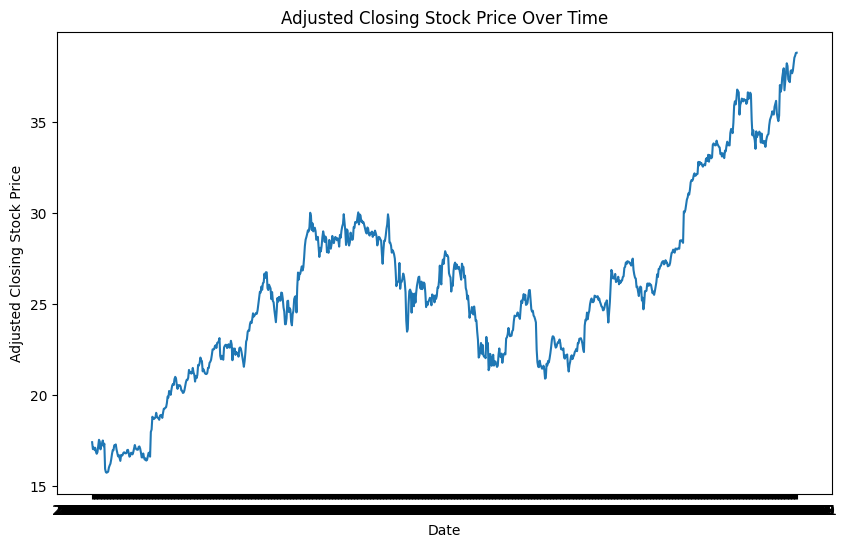

In [138]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='adj.close', data=AAPL)
plt.title('Adjusted Closing Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Stock Price')
plt.show()

We create some boxplots of the adjusted stock price by year.

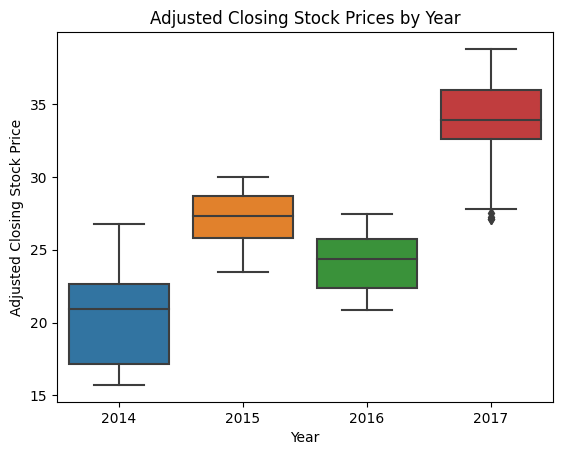

In [140]:
AAPL['datetime'] = AAPL['date']
AAPL['datetime'] = pd.to_datetime(AAPL['date'])
AAPL['year'] = AAPL['datetime'].dt.year
sns.boxplot(x='year', y='adj.close', data=AAPL)
plt.title('Adjusted Closing Stock Prices by Year')
plt.xlabel('Year')
plt.ylabel('Adjusted Closing Stock Price')
plt.show()

We use a diagram to visualize the adjusted price distribution. 

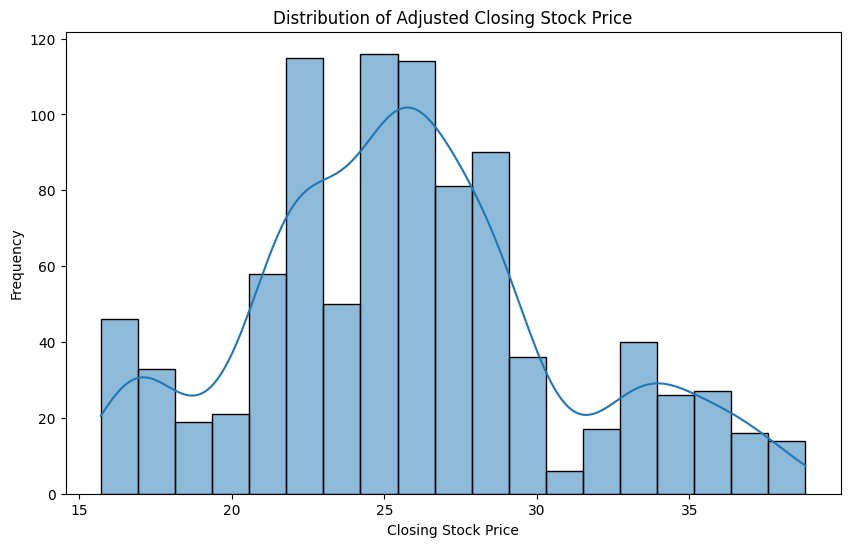

In [141]:
plt.figure(figsize=(10, 6))
sns.histplot(AAPL['adj.close'], kde=True)
plt.title('Distribution of Adjusted Closing Stock Price')
plt.xlabel('Closing Stock Price')
plt.ylabel('Frequency')
plt.show()

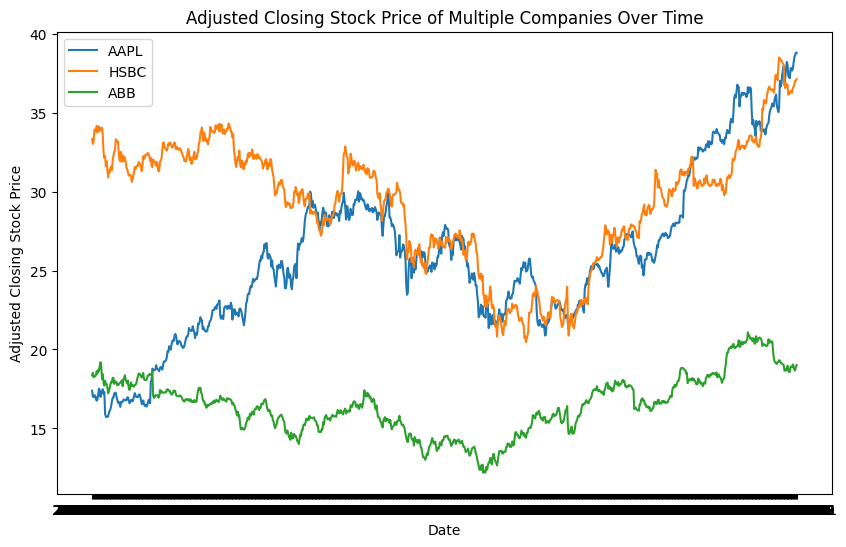

In [142]:
# Line chart of adjusted closing stock price for multiple companies over time
plt.figure(figsize=(10, 6))
stocks = ['AAPL','HSBC','ABB']
for stock in stocks:
    stock_df = pd.read_csv(f'/Users/liubohan/Downloads/Stock-Market-Prediction-main/arima/{stock}_arima.csv')
    sns.lineplot(x='date', y='adj.close', data=stock_df, label=stock)

plt.title('Adjusted Closing Stock Price of Multiple Companies Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Stock Price')
plt.legend()
plt.show()

We can see that different companies have different adjusted price. Thus, we need to normarlize our data so that the prices of each company has the same scale.

To visualize the daily returns, we can create a line chart that show the percentage change in price from one day to the next.

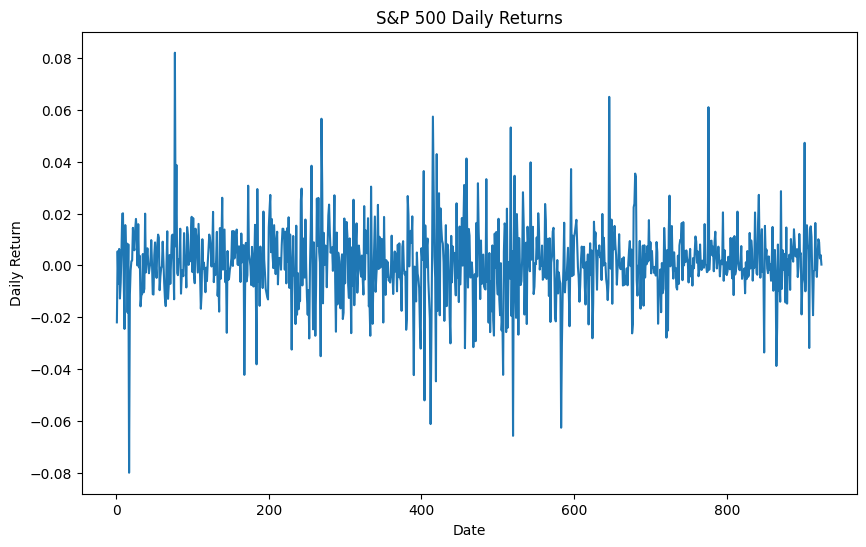

In [143]:
daily_returns = AAPL['adj.close'].pct_change()

# Create a line chart of the daily returns
plt.figure(figsize=(10, 6))
plt.plot(daily_returns.index, daily_returns.values)
#plt.axhline(y=0.005, color='r', linestyle='-')
plt.title('S&P 500 Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()
#This will create a line chart showing the daily returns over time.

We can also use a histogram to visualize the daily returns.

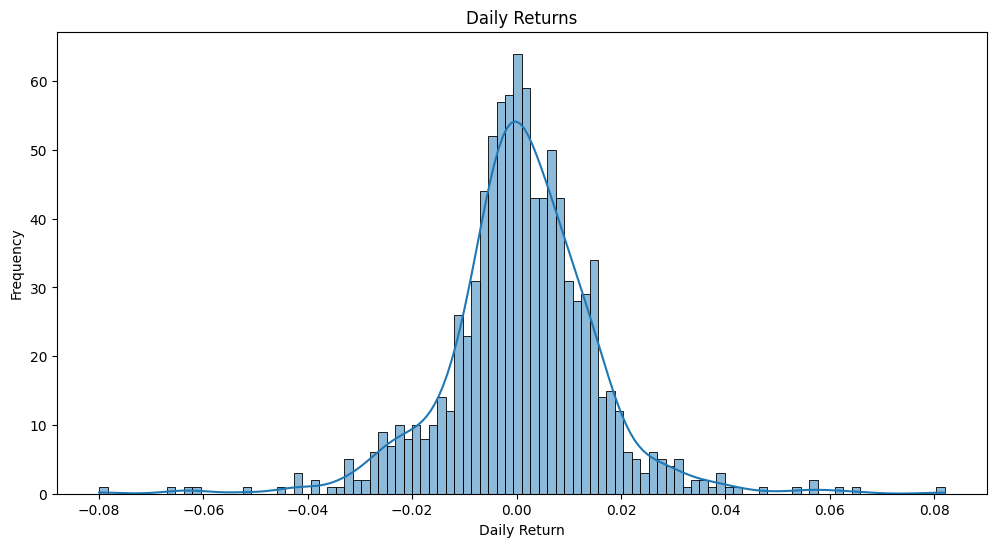

In [144]:
# Create a histogram of the daily returns
plt.figure(figsize=(12,6))
sns.histplot(AAPL['adj.close'].pct_change(), bins=100, kde=True)
plt.title('Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

In [145]:
np.sum(np.absolute(daily_returns < 0.005))

593

There are 593 dates when the absolute value of daily return is smaller than 0.005. Small absolute value of daily returns will contribute to the noise in stock prices, so we delete the stock price data of which the absolute value is smaller than 0.5%.

Why small daily return will cause noise in stock market prediction?

Answer:
Small daily returns can contribute to the noise in stock prices, especially when combined with other factors such as trading volume and market sentiment.

When a stock has small daily returns, it means that its price is not moving much on a day-to-day basis. However, these small daily returns can accumulate over time, and may cause the stock price to deviate from its fundamental value. This deviation can create noise in the stock price, as investors and traders may make short-term decisions based on the daily price movements rather than the company's long-term prospects.

Additionally, small daily returns can also be amplified by other factors. For example, if there is high trading volume in a particular stock, even small price movements can have a significant impact on the overall market. Similarly, if there is a prevailing market sentiment that is driving buying or selling activity, small daily returns may be magnified and lead to greater noise in stock prices.

Overall, while small daily returns may not be the sole cause of stock price noise, they can certainly contribute to it, especially when combined with other factors.

We can use a combination chart to visualize volume traded.

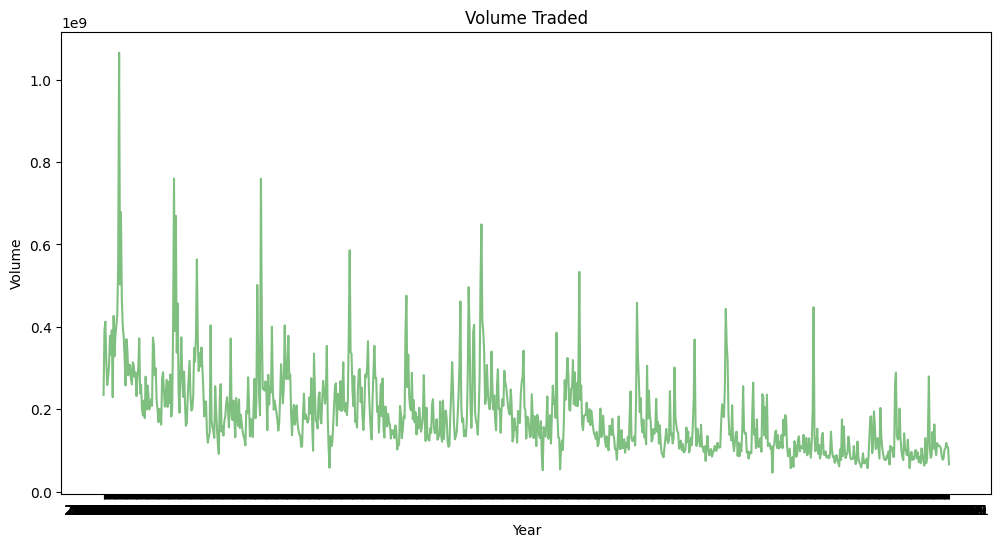

In [146]:
# Create a combination plot of stock prices and volume traded
plt.figure(figsize=(12,6))
#sns.lineplot(x='Date', y='Adj Close', data=AAPL, color='b')
sns.lineplot(x='date', y='volume', data=AAPL, color='g', alpha=0.5)
plt.title('Volume Traded')
plt.xlabel('Year')
plt.ylabel('Volume')
#plt.legend(['Adjusted Closing Price', 'Volume'])
plt.show()

We inverstigate the stock price data with additional statistical indicators.

In [147]:
AAPL.describe()

open        high         low   adj.close        volume  \
count  925.000000  925.000000  925.000000  925.000000  9.250000e+02   
mean    28.136586   28.368195   27.901853   25.774865  1.866978e+08   
std      5.168291    5.183917    5.141188    5.114004  1.006157e+08   
min     17.684999   17.911785   17.626785   15.711797  4.590360e+07   
25%     24.497499   24.777500   24.257500   22.287287  1.156484e+08   
50%     27.847500   28.105000   27.504999   25.488743  1.641020e+08   
75%     31.514999   31.772499   31.260000   28.488243  2.287172e+08   
max     41.200001   41.235001   40.907501   38.799847  1.065523e+09   

             macd     boll_ub     boll_lb      rsi_30      cci_30       dx_30  \
count  925.000000  925.000000  925.000000  925.000000  925.000000  925.000000   
mean     0.149490   26.801061   24.327520   55.650429   32.427968   26.287139   
std      0.409581    5.141593    4.883575    9.736318  111.683252   18.283694   
min     -0.977109   17.006334   15.279641   32.246846 -325.399253    0.041709   
25%     -0.082994   23.254191   21.234217   49.005947  -49.833743   11.416024   
50%      0.164613   26.833412   24.036931   54.785084   45.779240   23.717497   
75%      0.447196   29.625335   27.358612   62.643355  115.861959   38.162892   
max      1.127293   38.992681   36.715275   82.080231  345.143448   83.074083   

       close_30_sma  close_60_sma   arima_res   residuals         year  
count    925.000000    925.000000  925.000000  925.000000   925.000000  
mean      25.457444     25.149791   25.752037    0.022828  2015.365405  
std        4.915691      4.783683    5.102666    0.366116     1.069294  
min       16.562541     16.674853   15.722508   -1.579577  2014.000000  
25%       22.386653     22.572327   22.284277   -0.149275  2014.000000  
50%       25.506787     25.432087   25.471241    0.020285  2015.000000  
75%       28.411766     27.849120   28.482957    0.218620  2016.000000  
max       37.217357     35.821577   38.781562    1.731007  2017.000000

We investigate the distributions of each features and correlations between pairwise stock data features using pairplot and heatmap.

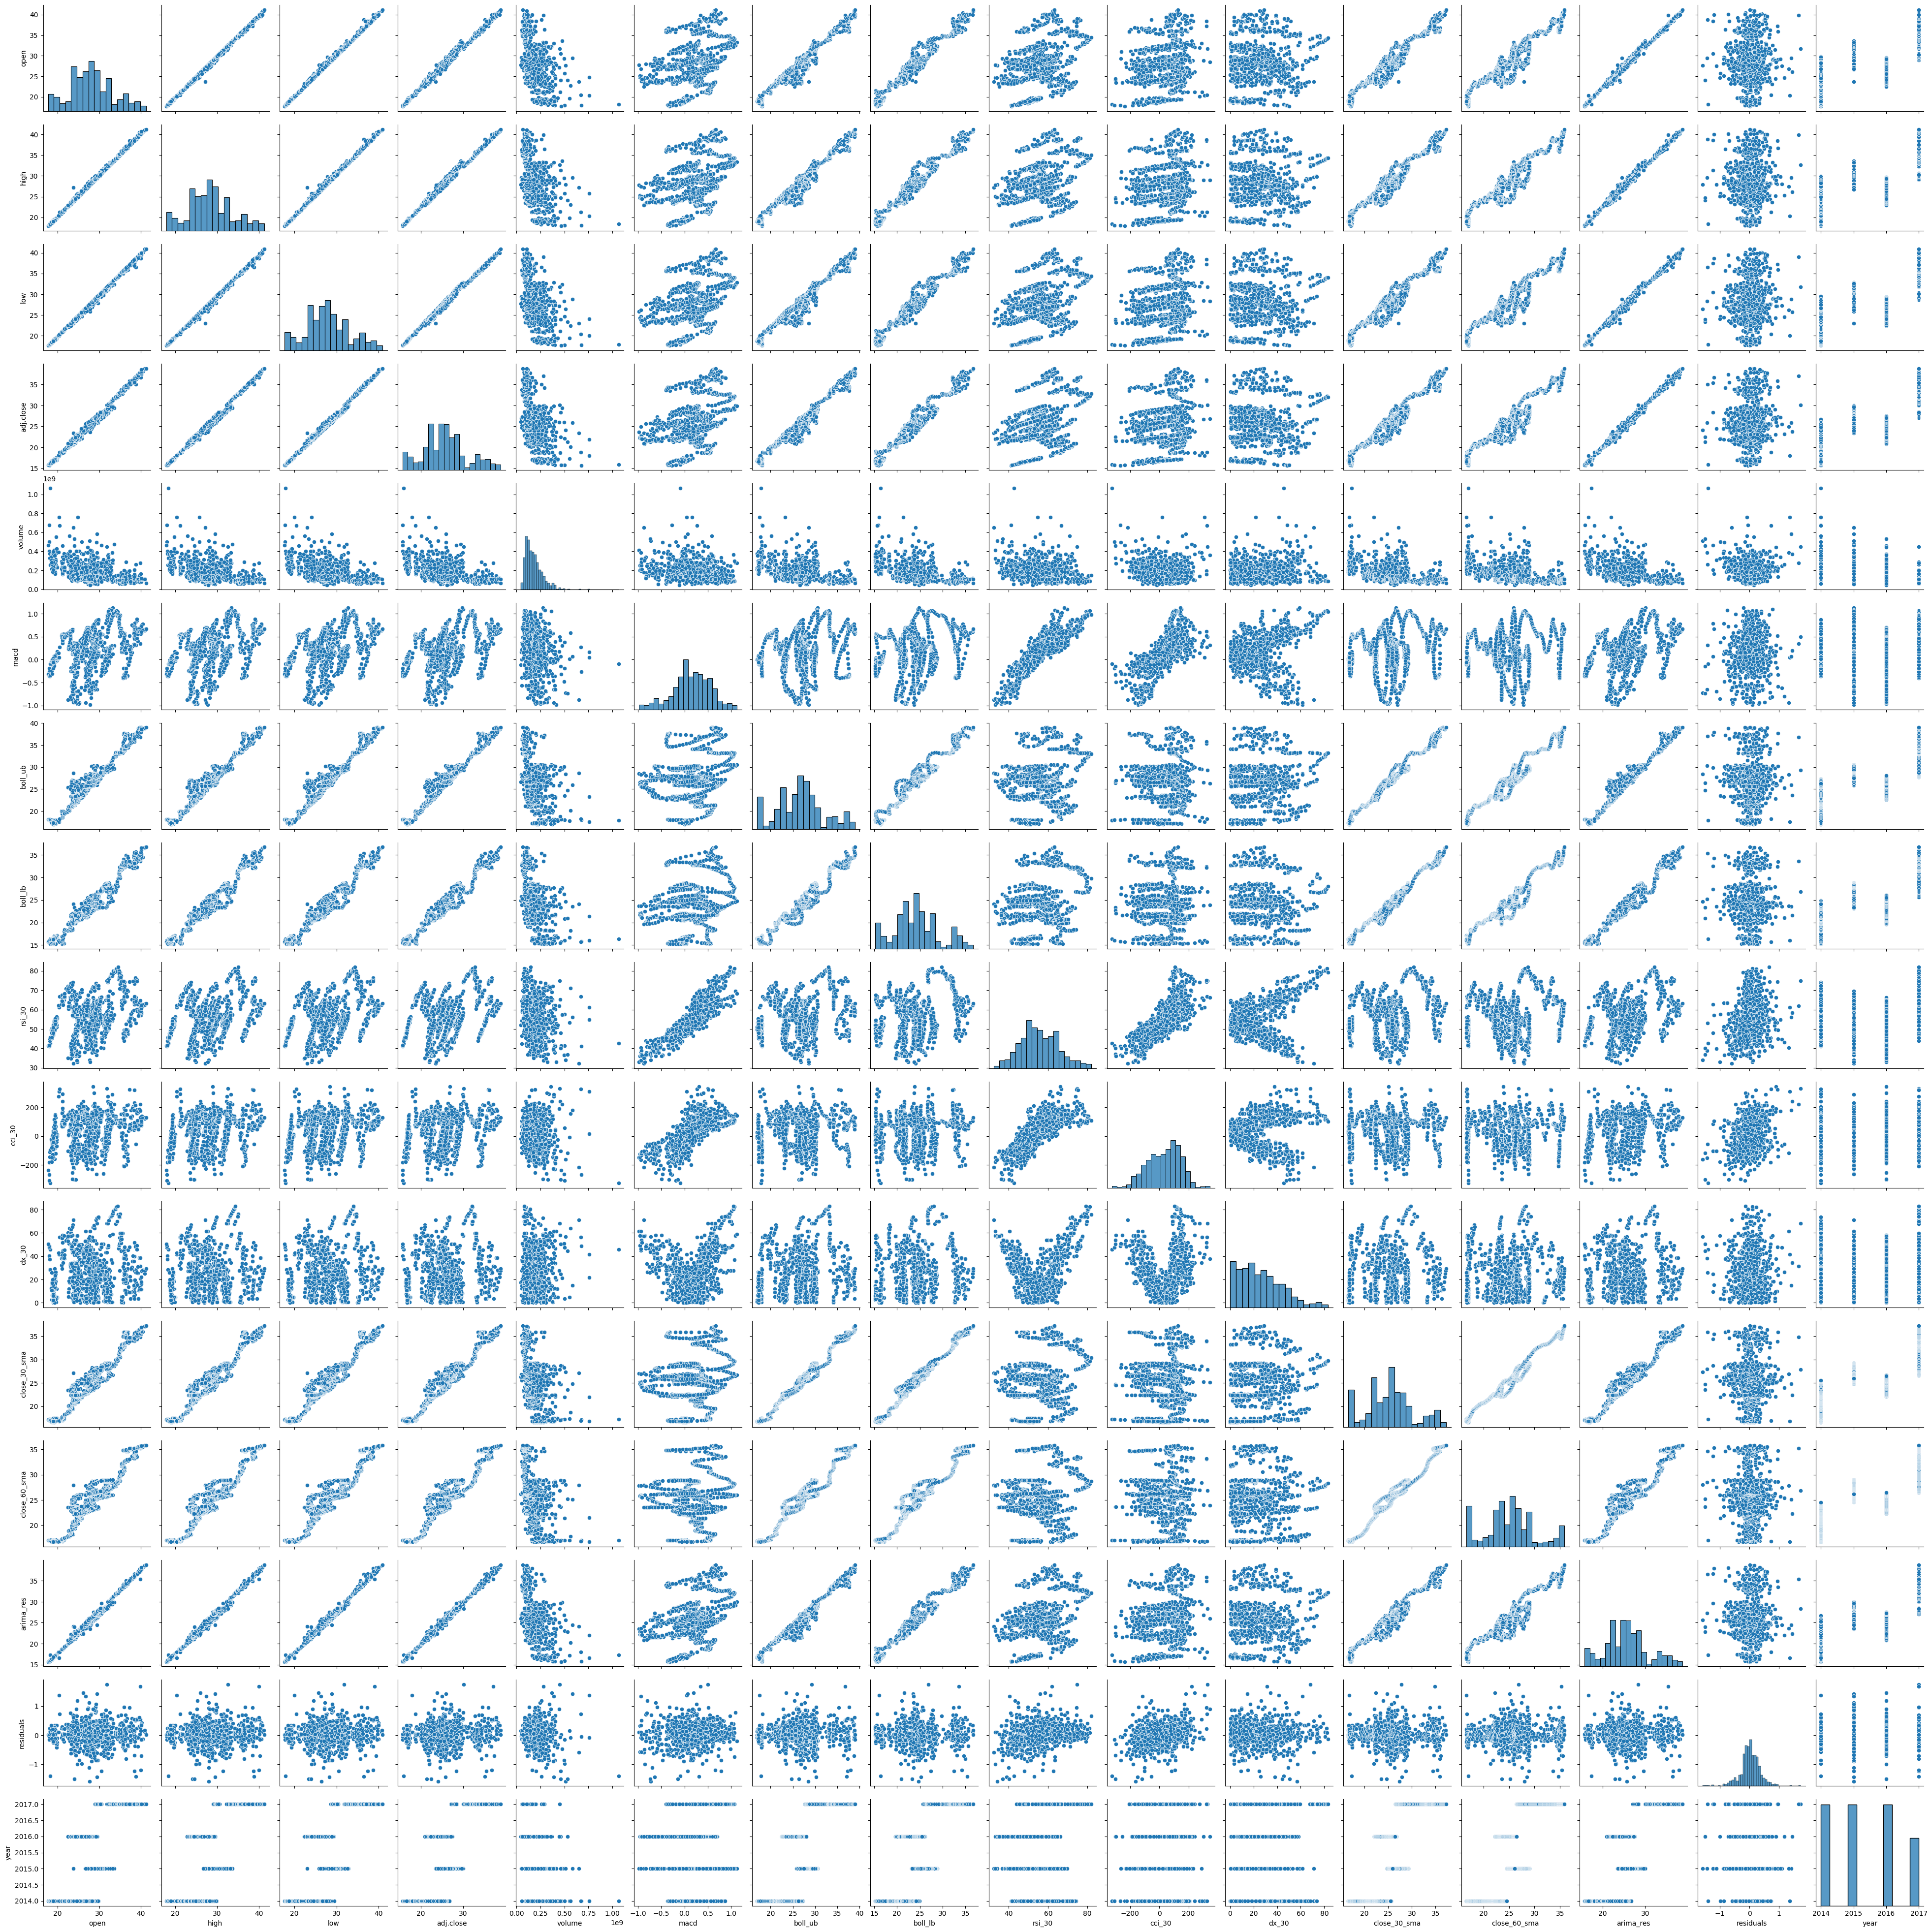

In [148]:
_ = sns.pairplot(AAPL)

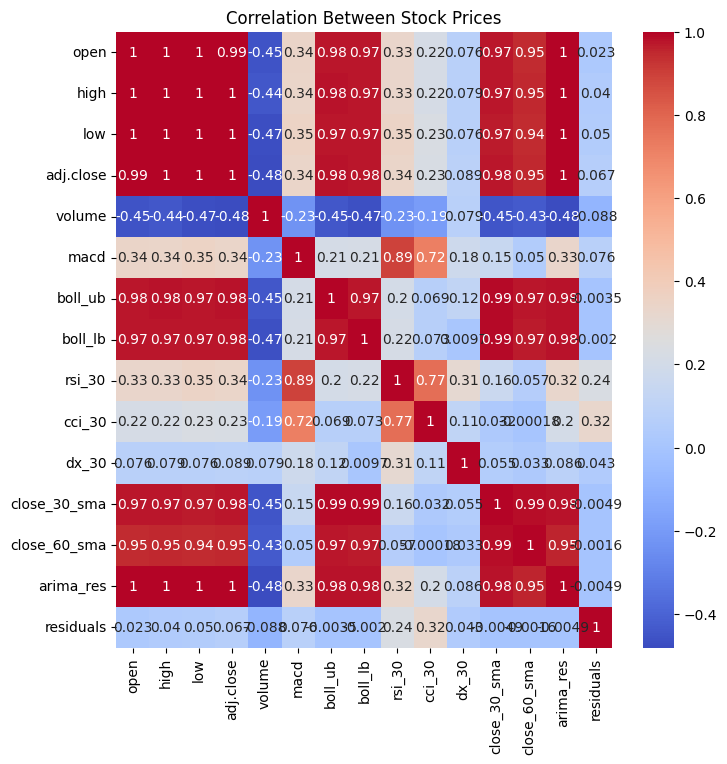

In [151]:
# Create a heatmap of the correlation between stock prices data features
corr = AAPL.drop(columns=['year']).corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Stock Prices')
plt.show()

We found that the variables open, high, low,  boll_ub, boll_lb, close_30_sma
, close_60_sma and arima_res have relatively large postive correlations with the predicted variable adj close. The variable volumn has relatively large negative correlation with adj close.

Next, we investigate the correlations between different stocks based on their daily return.

In [153]:
dfs = []
stocks = ["AAPL","ABB","ABBV","AEP","AGFS","AMGN","AMZN","BA","BABA","BAC","BBL",
         "BHP","BP","BRK-A","BUD","C","CAT","CELG","CHL","CHTR","CMCSA","CODI",
         "CSCO","CVX","D","DHR","DIS","DUK","EXC","FB","GD","GE","GOOG","HD",
         "HON","HRG","HSBC","IEP","INTC","JNJ","JPM","KO","LMT","MA","MCD","MDT","MMM",
         "MO","MRK","MSFT","NEE","NGG","NVS","ORCL","PCG","PCLN","PEP","PFE","PG",
         "PICO","PM","PPL","RDS-B","SNY","SO","SPLP","SRE","T",
         "TM","TOT","TSM","UL","UN","UNH","UPS","UTX","V","VZ","WFC","WMT","XOM"]

for stock in stocks:
    try:
        df = pd.read_csv(f'/Users/liubohan/Downloads/Stock-Market-Prediction-main/arima/{stock}_arima.csv')
    except:
        continue
    df[f'{stock}_Daily_return'] = df['adj.close'].pct_change()
    dfs.append(df[f'{stock}_Daily_return'])
    
df_return = pd.concat(dfs, axis=1)
df_return

AAPL_Daily_return  ABB_Daily_return  AEP_Daily_return  AMGN_Daily_return  \
0                  NaN               NaN               NaN                NaN   
1            -0.021966          0.008099         -0.000434          -0.011485   
2             0.005453         -0.015302         -0.000650          -0.008649   
3            -0.007152          0.005050          0.006510           0.025996   
4             0.006333         -0.001160         -0.006037          -0.004724   
..                 ...               ...               ...                ...   
920           0.010071         -0.010296          0.007204           0.012019   
921           0.008918         -0.006502         -0.002159           0.002620   
922           0.002701         -0.003490         -0.002570           0.008245   
923           0.003979          0.014886         -0.001627           0.023726   
924           0.000305          0.003451         -0.001222           0.005288   

     AMZN_Daily_return  BA_Daily_return  BAC_Daily_return  BHP_Daily_return  \
0                  NaN              NaN               NaN               NaN   
1            -0.003845         0.006951          0.019255          0.007912   
2            -0.007088         0.005740          0.015234         -0.007553   
3             0.011178         0.015172         -0.009604         -0.010894   
4             0.009773         0.002207          0.004848         -0.005733   
..                 ...              ...               ...               ...   
920           0.000804         0.005469         -0.002104          0.006344   
921           0.008499         0.013956         -0.005902          0.003969   
922           0.014182        -0.000125          0.017476         -0.004186   
923           0.013446        -0.003327          0.000838          0.015880   
924          -0.002396         0.002796          0.008372          0.015172   

     BP_Daily_return  BRK-A_Daily_return  ...  TM_Daily_return  \
0                NaN                 NaN  ...              NaN   
1          -0.002293            0.000091  ...        -0.000995   
2           0.002716           -0.010412  ...        -0.002821   
3           0.011459           -0.001748  ...         0.002413   
4           0.003707           -0.005230  ...        -0.005064   
..               ...                 ...  ...              ...   
920        -0.002027           -0.006398  ...        -0.005051   
921        -0.002901            0.000205  ...        -0.001692   
922         0.000000            0.008691  ...         0.001874   
923         0.010474            0.003809  ...         0.006145   
924         0.001152           -0.001429  ...         0.000443   

     TSM_Daily_return  UL_Daily_return  UNH_Daily_return  UPS_Daily_return  \
0                 NaN              NaN               NaN               NaN   
1           -0.011662        -0.001241          0.007108         -0.002226   
2           -0.002950        -0.002732         -0.011451         -0.012998   
3            0.000592         0.003736          0.030577          0.003244   
4            0.010644        -0.011662         -0.011632         -0.000784   
..                ...              ...               ...               ...   
920         -0.002171         0.001551          0.003756          0.003439   
921          0.002991         0.000000          0.008406          0.009667   
922          0.001356        -0.008258         -0.004321          0.000696   
923          0.001083         0.009889          0.015418         -0.005306   
924          0.006762         0.001374          0.004274          0.000262   

     V_Daily_return  VZ_Daily_return  WFC_Daily_return  WMT_Daily_return  \
0               NaN              NaN               NaN               NaN   
1          0.000679        -0.011837          0.007108         -0.003295   
2         -0.006013         0.005576          0.001764         -0.005594   
3          0.007642         0.012529         -0.0

In [154]:
#For each stock, we generate a list of stocks that has correlations greater than a bar value.
bar=0.5
corr = df_return.corr()
list_corr=[]
high_corr = {}
for i in corr.columns:
    high_corr[i] = list(corr[i][np.absolute(corr[i]>bar)].index)
    
high_corr


{'AAPL_Daily_return': ['AAPL_Daily_return'],
 'ABB_Daily_return': ['ABB_Daily_return',
  'BHP_Daily_return',
  'BP_Daily_return',
  'CAT_Daily_return',
  'HON_Daily_return',
  'HSBC_Daily_return'],
 'AEP_Daily_return': ['AEP_Daily_return',
  'D_Daily_return',
  'DUK_Daily_return',
  'EXC_Daily_return',
  'NEE_Daily_return',
  'PCG_Daily_return',
  'PPL_Daily_return',
  'SO_Daily_return',
  'SRE_Daily_return'],
 'AMGN_Daily_return': ['AMGN_Daily_return',
  'JNJ_Daily_return',
  'MRK_Daily_return',
  'PFE_Daily_return'],
 'AMZN_Daily_return': ['AMZN_Daily_return', 'GOOG_Daily_return'],
 'BA_Daily_return': ['BA_Daily_return',
  'C_Daily_return',
  'HON_Daily_return',
  'LMT_Daily_return',
  'MMM_Daily_return'],
 'BAC_Daily_return': ['BAC_Daily_return',
  'BRK-A_Daily_return',
  'C_Daily_return',
  'HON_Daily_return',
  'HSBC_Daily_return',
  'JPM_Daily_return',
  'MA_Daily_return',
  'WFC_Daily_return'],
 'BHP_Daily_return': ['ABB_Daily_return',
  'BHP_Daily_return',
  'BP_Daily_return',


In [155]:
# For each stock, we generate a list of ten stocks that has the highest correlations with the stock.
corr = df_return.corr()
abs_corr = np.absolute(corr)

#list_corr=[]
high_corr = abs_corr.head(10)
high_corr.index = range(1,11)

#abs_corr['AAPL_Daily_return'].nlargest(10).index

for i in corr.columns:
    high_corr[i] = list(abs_corr[i].nlargest(10).index)
    
high_corr

AAPL_Daily_return   ABB_Daily_return  AEP_Daily_return  \
1   AAPL_Daily_return   ABB_Daily_return  AEP_Daily_return   
2    HON_Daily_return   CAT_Daily_return  DUK_Daily_return   
3   MSFT_Daily_return   BHP_Daily_return   SO_Daily_return   
4     MA_Daily_return    BP_Daily_return  PPL_Daily_return   
5   CSCO_Daily_return  HSBC_Daily_return  NEE_Daily_return   
6    JPM_Daily_return   HON_Daily_return    D_Daily_return   
7   ORCL_Daily_return   MMM_Daily_return  PCG_Daily_return   
8    TSM_Daily_return     C_Daily_return  SRE_Daily_return   
9    MMM_Daily_return   JPM_Daily_return  EXC_Daily_return   
10  GOOG_Daily_return  ORCL_Daily_return   KO_Daily_return   

     AMGN_Daily_return  AMZN_Daily_return     BA_Daily_return  \
1    AMGN_Daily_return  AMZN_Daily_return     BA_Daily_return   
2     PFE_Daily_return  GOOG_Daily_return    HON_Daily_return   
3     JNJ_Daily_return    MA_Daily_return    LMT_Daily_return   
4     MRK_Daily_return     V_Daily_return      C_Daily_return   
5     DHR_Daily_return  MSFT_Daily_return    MMM_Daily_return   
6     MDT_Daily_return   DHR_Daily_return    JPM_Daily_return   
7   BRK-A_Daily_return   DIS_Daily_return  BRK-A_Daily_return   
8      MA_Daily_return    HD_Daily_return     GD_Daily_return   
9     JPM_Daily_return  AAPL_Daily_return     GE_Daily_return   
10    NVS_Daily_return  AMGN_Daily_return    WFC_Daily_return   

      BAC_Daily_return   BHP_Daily_return    BP_Daily_return  \
1     BAC_Daily_return   BHP_Daily_return    BP_Daily_return   
2       C_Daily_return    BP_Daily_return   CVX_Daily_return   
3     JPM_Daily_return   CAT_Daily_return   XOM_Daily_return   
4     WFC_Daily_return   CVX_Daily_return   BHP_Daily_return   
5   BRK-A_Daily_return  HSBC_Daily_return  HSBC_Daily_return   
6    HSBC_Daily_return   XOM_Daily_return   CAT_Daily_return   
7      MA_Daily_return   ABB_Daily_return   ABB_Daily_return   
8     HON_Daily_return     C_Daily_return   JPM_Daily_return   
9     CAT_Daily_return   JPM_Daily_return    GE_Daily_return   
10     GE_Daily_return    GE_Daily_return     C_Daily_return   

    BRK-A_Daily_return  ...     TM_Daily_return   TSM_Daily_return  \
1   BRK-A_Daily_return  ...     TM_Daily_return   TSM_Daily_return   
2     WFC_Daily_return  ...      C_Daily_return  INTC_Daily_return   
3     JPM_Daily_return  ...    WFC_Daily_return  ORCL_Daily_return   
4       C_Daily_return  ...   HSBC_Daily_return    MA_Daily_return   
5     BAC_Daily_return  ...    JPM_Daily_return   DHR_Daily_return   
6     HON_Daily_return  ...  BRK-A_Daily_return   ABB_Daily_return   
7     MMM_Daily_return  ...    HON_Daily_return   HON_Daily_return   
8     UPS_Daily_return  ...     MA_Daily_return  AAPL_Daily_return   
9     JNJ_Daily_return  ...    BAC_Daily_return  HSBC_Daily_return   
10     GD_Daily_return  ...      V_Daily_return  CSCO_Daily_return   

      UL_Daily_return    UNH_Daily_return    UPS_Daily_return  \
1     UL_Daily_return    UNH_Daily_return    UPS_Daily_return   
2     PM_Daily_return    MDT_Daily_return  BRK-A_Daily_return   
3    SNY_Daily_return   AMGN_Daily_return    MMM_Daily_return   
4    NVS_Daily_return    PFE_Daily_return    HON_Daily_return   
5   HSBC_Daily_return  BRK-A_Daily_return    JPM_Daily_return   
6     PG_Daily_return    WFC_Daily_return     MA_Daily_return   
7     TM_Daily_return    JPM_Daily_return    WFC_Daily_return   
8    HON_Daily_return    HON_Daily_return     GD_Daily_return   
9    JNJ_Daily_return    DHR_Daily_return     GE_Daily_return   
10    KO_Daily_return      C_Daily_return    JNJ_Daily_return   

        V_Daily_return     VZ_Daily_return    WFC_Daily_return  \
1       V_Daily_return     VZ_Daily_return    WFC_Daily_return   
2      MA_Daily_return      T_Daily_return    JPM_Daily_return   
3     HON_Daily_return    MMM_Daily_return    BAC_Daily_return   
4       C_Daily_return  BRK-A_Daily_return      C_Daily_return   
5     DHR_Daily_return    JNJ_Daily_return  BRK-A_Daily_return   
6     JPM_Daily_r